In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wid #package to interact with plots


<span style="font-family:chalkduster,fantasy;fontsize:90%;color:crimson">
<h1>Randomness and Probabilities</h1>


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Introducing the functions</h2>
    
Numpy has a submodule called `random` that allows us to deal with probabilities and randomeness. There are several functions within this submodule that will be useful to us.
    
|Function|What it does|
|:---:|:---:|
|`np.random.rand(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats<br> between 0 and 1 from a uniform distribution|
|`np.random.randn(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats<br> between 0 and 1 from a normal distribution|
|`np.random.randint(min,max,(nrow,ncol))`|Generates an array of `nrow` rows and `ncol` columns of random integers<br> between `min` (inclusive) and `max` (exclusive) from a uniform distribution|
|`np.random.choice(arr,p=p_arr,size=(nrow,ncol),replace=True)`|Generates an array of `nrow` rows and `ncol` columns from the given `arr`|
|`np.random.permutation(arr)`|Returns a permuted array of `arr`|
    
To make things simpler, if you prefer, you can import
    
`import numpy.random as r`

I won't do that however -- I have no idea why, but I just prefer typing out `numpy.random`. And I know it's not sensible. I just prefer it that way.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Cellular Automaton I: Three Simple 1D Examples</h2>
    

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Introduction</h3>
    
At the end of this block, we how to see how we can use the techniques learned from cellular automata to model the spread of an epidemic. In this first class however, we consider a simple 1D example first to understand the mechanism of how CA works.
    
One of the main functions that we will need to use in this block that we have been introduced to, but may not have used very often is the `imshow()` function. This function will allow us to visualize our cells.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example 5a: Reminder on <code>imshow()</code></h3>
    
The syntax to call `imshow()` is:
    
```imshow(arr,cmap="Colormap_you_choose")
    ```
    
We first attempt to do an `imshow()` plot with the following 2 by 2 array defined for you below. Plot it with the colormap `"seismic"` first, followed by with the colormap `"Greys"`. See [this link](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for all the possible colourmaps available to us.

In [4]:
xIm=np.linspace(0,1,25)
xIm=np.reshape(xIm,(5,5))
print(xIm)

[[0.         0.04166667 0.08333333 0.125      0.16666667]
 [0.20833333 0.25       0.29166667 0.33333333 0.375     ]
 [0.41666667 0.45833333 0.5        0.54166667 0.58333333]
 [0.625      0.66666667 0.70833333 0.75       0.79166667]
 [0.83333333 0.875      0.91666667 0.95833333 1.        ]]


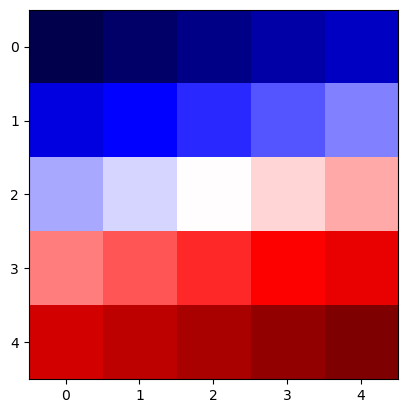

In [7]:
plt.imshow(xIm,cmap="seismic");

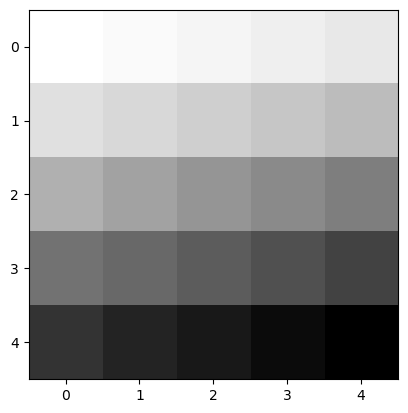

In [8]:
plt.imshow(xIm,cmap="Greys");

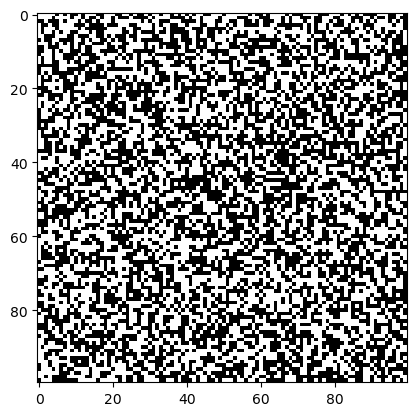

In [9]:
x=np.random.choice([0, 1], size = (100, 100))
plt.imshow(x,cmap="Greys");

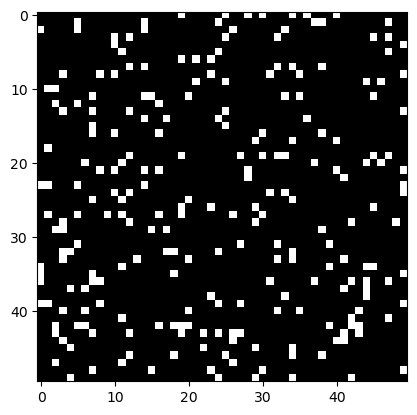

In [11]:
x=np.random.choice([0, 1], size = (50, 50),p=[0.1, 0.9])
plt.imshow(x,cmap="Greys");

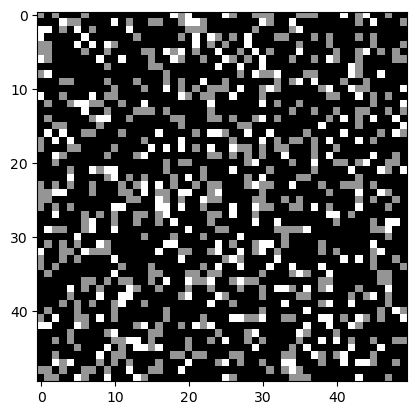

In [12]:
x=np.random.choice([0, 0.5, 1], size = (50, 50),p=[0.1, 0.2, 0.7])
plt.imshow(x,cmap="Greys");

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Implementation</h3>
    
Our aim in this class is to apply the CA to a 1D model and visualize it using `imshow()`. Therefore,
    
- We will start with a 1D array of length `N`.
- We will apply the predefined rule to generate the next 1D array of length `N` a total number of `t` times
    - Now we have `t` 1D arrays of length `N`
- We can combine these `t` 1D arrays of length `N` into <b><i><u>one</u></i></b> 2D array of size `t` by `N`.
    - That is, it has `t` rows and `N` columns
- We will then visualize this array via `imshow()`
    
For simplicity, and because it's just visually more pleasing, I will always take the same number of `t` as we have `N` to get out a square plot. The initialization of the variables is given to you as below.

In [14]:
N=10
t=10
SampleSpace=[0,1] #We only have two states. 0-White; 1-Black

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #6a: Rule #1 - Inverse of itself</h3>
    
In this example, we create a CA following the rule: Cell `i` will be the inverse of itself in the previous configuration.
    
Some hints:
- Start by creating an `out` array of zeros of the correct dimension    
- Next, initializing the first row of `out` to be a random choice of 0 and 1
- Then, for each element of the second row of `out`, implement the rule:
    - That is, check the corresponding element in the first row of `out`.
    - Assign the opposite of that element in the second row of `out`.
    - The easiest way to implement this is via a for loop.
        - Ensure that you use the correct variable for the iterable!
    - Print `out` to check that no mistakes were made. 
    - Visualize `out` via `imshow` to ensure everything is working!
- Repeat this for the third row (and fourth row if necessary) [If you're fine skipping this step, go straight to 4.].
- Convert the previous step into a second for loop.

[[0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


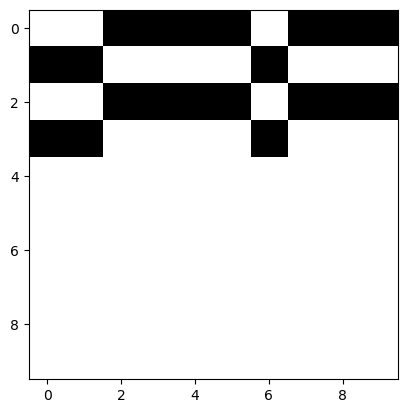

In [17]:
out=np.zeros((t,N))
out[0,:]=np.random.choice(SampleSpace, size=N)

for i in range(N):
    if out[0, i]==0: # == 이면 같은거. 일치한다면이라는뜻
        out[1, i]=1 # = 이면 1이다. 라는 의미. 1로 바꿔라
for i in range(N):
    if out[1,i]==0:
        out[2,i]=1

for i in range(N):
    if out[2,i]==0:
        out[3,i]=1
        
print(out)
plt.imshow(out, cmap="Greys")

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]]


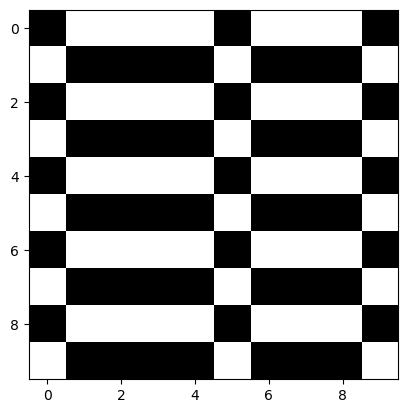

In [18]:
out=np.zeros((t,N))
out[0,:]=np.random.choice(SampleSpace, size=N)

for j in range(1, t): # 1부터 시작해야 j-1이 음수가 아니라 0부터 시작됨
    for i in range(N):
        if out[j-1, i]==0:
            out[j, i]=1
  
print(out)
plt.imshow(out, cmap="Greys")

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #6b: Rule #2 - Inverse of the next cell!</h3>
    
In this example, we create a CA following the rule: Cell `i` will be the inverse of cell `i+1` in the previous configuration.
    
Some hints:
- Start by creating an `out` array of zeros of the correct dimension    
- Next, initializing the first row of `out` to be a random choice of 0 and 1
- Then, for each element of the second row of `out`, implement the rule:
    - That is, check the `i+1`-th element in the first row of `out`.
    - Assign the opposite of that element to `i` in the second row of `out`.
    - The easiest way to implement this is via a for loop.
        - Ensure that you use the correct variable for the iterable!
    - Print `out` to check that no mistakes were made. 
    - Visualize `out` via `imshow` to ensure everything is working!
- Repeat this for the third row (and fourth row if necessary) [If you're fine skipping this step, go straight to 4.].
- Convert step 3 into a second for loop.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
<div class = "alert alert-danger">
<p style="text-align: center">  Recall because we're comparing with `i+1`, the last cell cannot be assigned anything. Take note of that when you code it in!
    </p>
    </div>  

In [79]:
N=10
t=10
SampleSpace=[0,1] #We only have two states. 0-White; 1-Black

[[1. 0. 1. 1. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


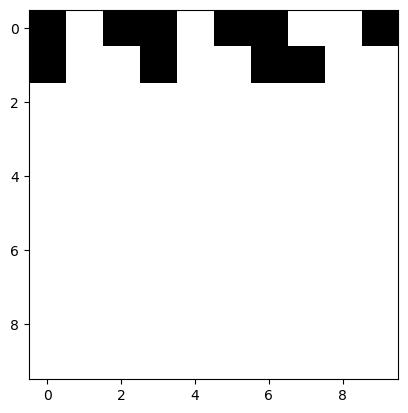

In [19]:
out=np.zeros((t,N))
out[0, :]=np.random.choice(SampleSpace, size=N)

for i in range(N-1):
    if out[0, i+1]==0:
        out[1,i]=1

print(out)
plt.imshow(out, cmap="Greys")

[[0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]


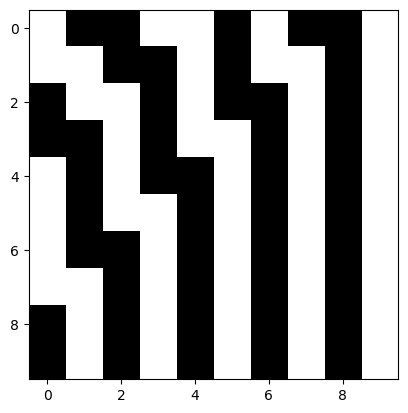

In [21]:
out=np.zeros((t, N))
out[0, :]=np.random.choice(SampleSpace, size=N)

for j in range(1, t):
    for i in range(N-1):
        if out[j-1, i+1]==0:
            out[j, i]=1
    
print(out)
plt.imshow(out, cmap="Greys")

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #6c: Rule #3 </h3>
    
In this example, we create a CA following the rule: 
- Cell `i` will be assigned the value 0 if cell `i` and cell `i+1` are the same in the previous configuration
- Cell `i` will be assigned the value 1 if cell `i` and cell `i+1` are the different in the previous configuration
    
Some hints:
- Start by creating an `out` array of zeros of the correct dimension    
- Next, initializing the first row of `out` to be a random choice of 0 and 1
- Then, for each element of the second row of `out`, implement the rule:
    - That is, check the `i` and `i+1`-th element in the first row of `out`.
    - If they are different, assign 1 to cell `i`.
    - The easiest way to implement this is via a for loop.
        - Ensure that you use the correct variable for the iterable!
    - Print `out` to check that no mistakes were made. 
    - Visualize `out` via `imshow` to ensure everything is working!
- Repeat this for the third row (and fourth row if necessary) [If you're fine skipping this step, go straight to 4.].
- Convert step 3 into a second for loop.

In [24]:
N=10
t=10
SampleSpace=[0,1] #We only have two states. 0-White; 1-Black

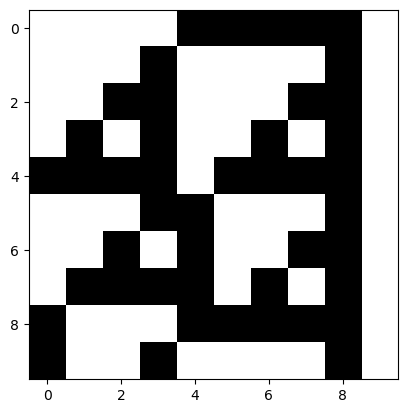

In [25]:
out=np.zeros((t,N))
out[0, :]=np.random.choice(SampleSpace, size=N)

for j in range(1,t):
    for i in range(N-1):
        if out[j-1, i]!=out[j-1, i+1]:
            out[j, i]=1
#print (out)
plt.imshow(out,cmap="Greys")

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Cellular Automaton II: Modelling epidemics</h2>
    

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Introduction:</h3> 
    
To model the spread of epidemics, we will need to increase our sample space to three possibilities:
- Susceptible (i.e. have yet to be infected)
- Infected
- Recovered
We will use three different colours to represent this three different states.
    
Unlike with the previous example also, we will have a 2D grid of cell in every time-step! That is, in each time step, the configuration of cells we will have is `N` by `N`, and it will represent $N^2$ people.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example 7a: Reminder on <code>imshow()</code> II</h3>
    
To model the three different states, we will use three colours from the colourmap `"Greys"`. Note that:
- Susceptible people shall be denoted as 0.5 (Grey)
- Infected people shall be denoted as 1 (Black)
- Recovered people shall be denoted as 0 (White)

<div class = "alert alert-danger">
<p style="text-align: center">  Take note of the potentially confusing colour assignment. Most people will start out grey (susceptible) before turning black (infected) and then going white (recovered). 
    </p>
    </div>  
    
Produce a grid of 100 people similar to the one below below by:
![Lect2_imshow](Pictures\Lect2_imshow.png)
- Definining a 10 by 10 array filled with either `[0,0.5,1]` using the `choice()` function.
- Call for `imshow()` with the colourmap `"Greys"`

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
Now create the same grid of 100 people but with there being a probability of 1% of the population being infected and another 1% of the population recovered.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
Now create the same grid of 10000 people but with there being a probability of 1% of the population being infected and another 1% of the population recovered.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Reminder on 3D arrays:</h3>

We will be manipulating 3D arrays in this model as in each time-step, there will be an `N` by `N` grid representing people, and we will have `t` number of time steps. Therefore, we will end up with an array of shape `(t,N,N)`. That is, it will have `t` number of layers (axis 0), `N` number of rows (axis 1) and columns (axis 2). 
    
Here's a quick reminder on how one can visualize the different axes of an array. Recall that this is just a suggested way of visualizing the arrays -- but sticking to a particular visualization might help!
![Lect2_Array](Pictures/Lect2_Array.png)

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

To create a 3D array filled with zeros: `np.zeros((layer_no,row_no,col_no))`, where again for 3D arrays
- layer represents axis 0
- row represents axis 1
- column represents axis 2

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example 7b: Simple 3D arrays manipulations I</h3>
    
First, create a 3 (axis 0) x 4 (axis 1) x 5 (axis 2) numpy array of zeros called `MyArray`
    
Next, 
- Fill the first layer of axis 0 with ones
- Fill the second layer of axis 0 with twos
- Fill the third layer of axis 0 with threes.
    
Print the array to confirm you did it right!

Repeat the process for axis 1. (Starting with a numpy array of zeros, fill the fourth layer of axis 1 with fours)